This is a web scarpper written in python 
This will scrap the used cars data available for sale in Pune(India) 
Data obtained from this is alos attached 

Author :  Harish kemkar

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:


#r = requests.get("https://www.cars24.com/buy-used-cars-pune/?page=1")
#r = requests.get("https://www.cars24.com/buy-used-cars-pune/?page=2")
#r = requests.get("https://www.cars24.com/buy-used-cars-pune/?page=3")
r = requests.get("https://www.cars24.com/buy-used-cars-pune/?page=4")

c = r.content

#print(c)

soup = BeautifulSoup(c,"html.parser")
#print(soup)

car_name =  soup.find_all("h3",{"class":"_1Nvyc _1Corb"})
model_date =  soup.find_all("li",{"itemprop":"modelDate"})
engine_type =  soup.find_all("span",{"class":"_36qGZ"})
price_exp = soup.find_all("strong",{"class":"_1_oF1"})


#<strong class="_1_oF1

#<li><span>•</span> <!-- -->52,614 km</li
#<li itemprop="modelDate">2016</li>
#span itemprop="name" class="_36qGZ">Diesel</spa
#soup.find_all("div",{"class":"propertyRow"})

len(car_name)
len(model_date)
len(price_exp)

print(car_name)
print(model_date)
print(engine_type)
print(price_exp)


km_data = []

for Li_tag in soup.find_all("li"):
    for span_tag in Li_tag.find_all("span"):
        if span_tag.text == "•":
           # print("• found")
           # print(Li_tag)
           # print(span_tag)
        #words = soup.body.get_text()
           
            text_body = Li_tag.get_text()
            #print(text_body)
            if "km" in text_body:
                #print("km detail found")
                text_body =  text_body.replace("• ","")
                km_data.append(text_body)
                print(text_body)
        
        
#len(km_data)

## Extracting car Features 

list_car = []
for i in range(len(car_name)):
    d = {}
    try:
     d["car_name"] = car_name[i].text
    except:
        d["car_name"] =  "no name"

    try:
        d["model_date"] = model_date[i].text
    except:
        d["model_date"] = "NO Model_date "
        
    try:
        d["engine_type"] = engine_type[i].text
    except:
        d["engine_type"] = "Engine type not avaailable"
    try:
        d["km_data"] =  km_data[i]
    except:
        d["km_data"] =  "km data not avaailable"

    try:
     d["price_exp_rs"] = price_exp[i].text.replace("₹","")
    except:
        d["price_exp_rs"] =  "no expected price given"

    
    list_car.append(d)
    
 

df = pd.DataFrame(list_car)




In [ ]:
print(df)


In [ ]:
## Execute this for the first iteration
df.to_csv("E:/Harish/DataScience/webscrapper/output.csv",index = False )

In [ ]:
## Execute below for all other iteration
df.to_csv("E:/Harish/DataScience/webscrapper//output.csv",mode = 'a',header = False,index = False )

In [63]:
## Read from the file created 

df_out = pd.read_csv('E:/Harish/DataScience/webscrapper/output.csv',delimiter = ',',engine = 'python')

df_out['Price_RS'] = df_out["price_exp_rs"]

df_out = df_out.drop(columns=['price_exp_rs'])

print(df_out.columns)


Index(['car_name', 'engine_type', 'km_data', 'model_date', 'Price_RS'], dtype='object')


In [32]:
## Analysis of the data scrapped  
## Expolring Data sets 


#df_heart['target'].value_counts()


print(df_out.columns)
# Index(['car_name', 'engine_type', 'km_data', 'model_date'], dtype='object')

df_out.isnull().any()
## No Null values in any coulmmns 

df_out.count()
## 62 records in the datasets

## Out of all the available cars number of petrol/Diesel/Petrol+CNG cars available for sale  

#len(df_out[df_out["engine_type"] == 'Petrol']) 54/62
#len(df_out[df_out["engine_type"] == 'Diesel']) 5/62
#len(df_out[df_out["engine_type"] == 'Petrol + CNG']) 3/62



Index(['car_name', 'engine_type', 'km_data', 'model_date', 'Price_RS'], dtype='object')


car_name       62
engine_type    62
km_data        62
model_date     62
Price_RS       62
dtype: int64

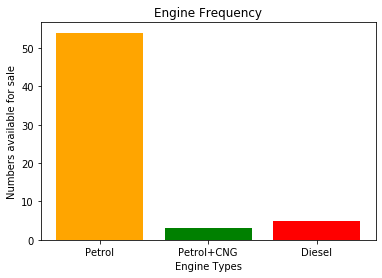

In [33]:
## PLotting Bargraph for engine types

petrol_car = len(df_out[df_out["engine_type"] == 'Petrol'])
petrol_CNG_car = len(df_out[df_out["engine_type"] == 'Petrol + CNG'])
diesel_car = len(df_out[df_out["engine_type"] == 'Diesel'])

colors_engine  =  ['Orange','green','red'] 

engine_type =  ['Petrol','Petrol+CNG','Diesel']
count_engine  = [petrol_car,petrol_CNG_car,diesel_car]

plt.bar(engine_type,count_engine,color = colors_engine)
plt.title('Engine Frequency')
plt.xlabel('Engine Types')
plt.ylabel('Numbers available for sale')

plt.show()



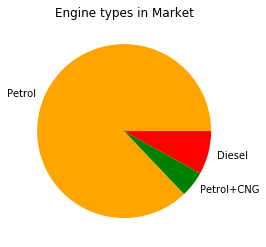

In [34]:

plt.pie(count_engine,labels=engine_type, colors=colors_engine)
plt.title('Engine types in Market')
plt.show()


In [62]:
## Analysing model_date column

#print(df_out.columns)
# model_date , Price_RS

print(df_out['model_date'].min())
print(df_out['model_date'].max())

2006
2018


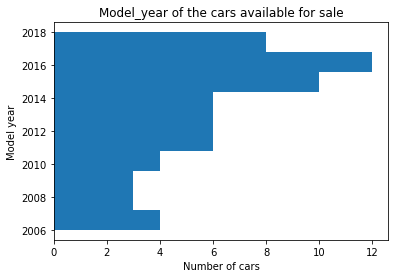

In [61]:
plt.hist(df_out['model_date'],bins = 10,orientation = 'horizontal')
plt.ylabel('Model year')
plt.xlabel('Number of cars')
plt.title("Model_year of the cars available for sale")
plt.show()